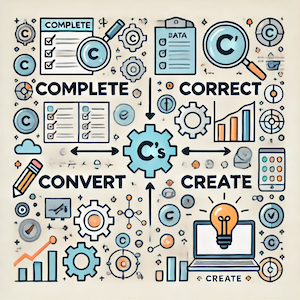

## The 4 C's
- Complete: Ensuring that data is present. This step involves imputing missing data, removing incomplete records, or gathering additional information to fill in missing values.

- Correct: Addressing inaccuracies and outliers in the data. This involves checking if strings are misspelled or if certain values are outliers. Removing outliers and fixing data labels are both forms of data correction.

- Convert: Transforming data into a format for machine learning models. This includes normalizing/scaling numerical features, encoding categorical variables, and converting text data into numerical representations. The goal is to ensure that the data is in a format for modeling.

- Create: Generating new features to enhance model performance. This step involves feature engineering, such as discretizing continuous features, aggregating data, or generating new features based on combinations of existing ones. The aim is to enrich the dataset with additional features that can improve the predictive power of the model.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning, message='divide by zero encountered in log10')


In [ ]:
## Download Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)
titanic_df.iloc[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C


### Complete
Remove columns with a lot of missing values (how many missing values is subjective). Inpute (aka estimate/guess) missing values if the number of missing values is not large and the missing value won't be an outlier.


**Note: Imputation can lead to overfitting of a model**

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Drop Cabin Column
titanic_df.drop(['Cabin'], axis=1, inplace=True)
titanic_df.iloc[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,C


#### Imputation
Notice in the third row Passenger 889 does not have an age. We can impute age using a KNN algorithm which will take the 5 rows with the most similar attributes and create an average from that to guess the age. Additionally, the mean or median values of the column can be used.

In [ ]:
# Convert 'Embarked' to numeric values for KNN imputer
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define the KNN imputer (comparing the 5 closest rows)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the columns with missing data: 'Age', 'Fare', and 'Embarked'
titanic_df[['Age', 'Fare', 'Embarked']] = knn_imputer.fit_transform(titanic_df[['Age', 'Fare', 'Embarked']])

# Convert 'Embarked' back to original categorical values
titanic_df['Embarked'] = titanic_df['Embarked'].round().map({0: 'S', 1: 'C', 2: 'Q'})

In [ ]:
titanic_df.iloc[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,33.3,0,0,244373,13.000,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,31.1,0,0,2649,7.225,C


**Note: Imputation may not be ideal in all datasets**
In a dataset like this, imputation may be less helpful as the correlation between features (how similar one column is to another) is not strong. Charles Eugene and Fatima Masselmani were 24 & 22 respectively at the time of the sinking and our estimates call place them in their early thirties.  

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Correct
We can correct the data by removing outliers. Let's begin by finding them.

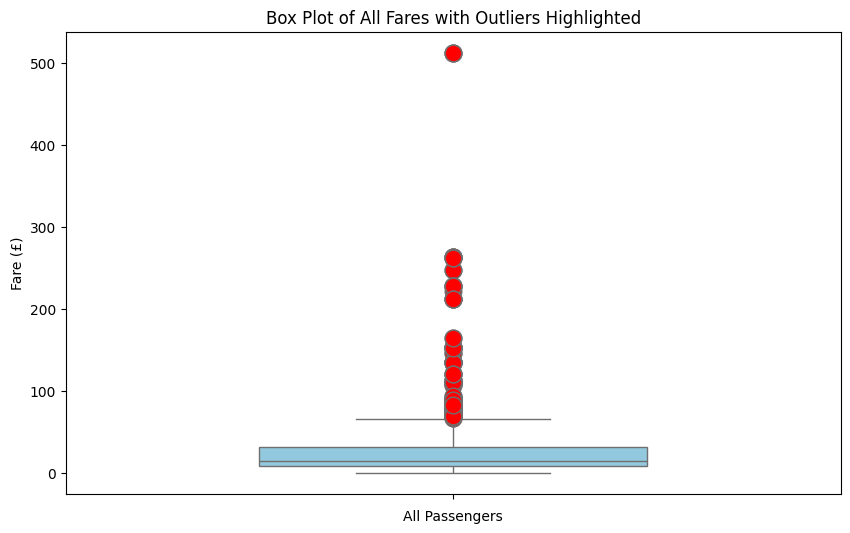

In [ ]:
# Define the properties for the outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, y='Fare', flierprops=flierprops, color='skyblue', width=0.5)
plt.xlabel('All Passengers')
plt.ylabel('Fare (£)')
plt.title('Box Plot of All Fares with Outliers Highlighted')
plt.show()

In [ ]:
# Function to identify outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers
outliers = find_outliers(titanic_df, 'Fare')
outliers['Fare'].min()

66.6

Text(0.5, 1.0, 'Outliers by Pclass')

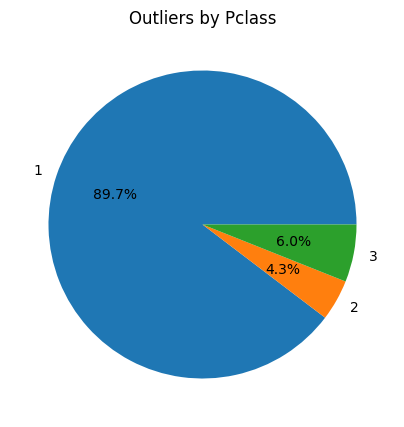

In [ ]:
# Group outliers by Pclass
outliers_by_pclass = outliers.groupby('Pclass')['Fare'].count()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(outliers_by_pclass, autopct="%1.1f%%", labels=outliers_by_pclass.index)
plt.title('Outliers by Pclass')

Any passenger that paid more then £66.6 is an outlier using the difference from the mean ticket price. However, there are mulitple ship classes and as we see above, passenger class will affect the price.

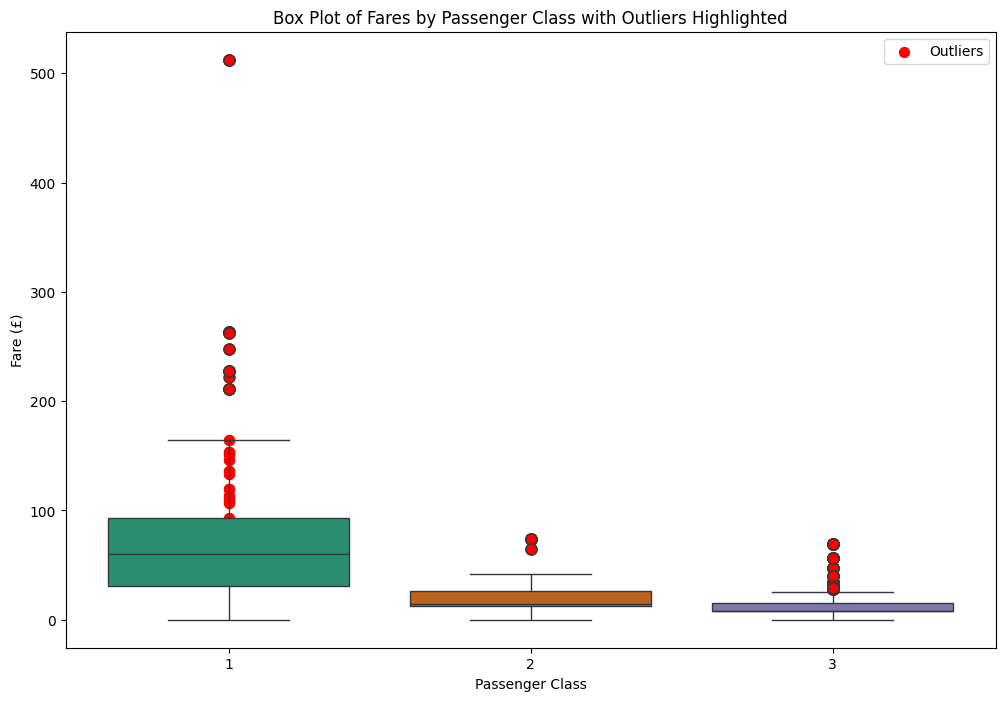

In [ ]:
# Define the properties for the outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=titanic_df, x='Pclass', y='Fare', flierprops=flierprops, palette='Dark2')
plt.scatter(outliers['Pclass'] - 1, outliers['Fare'], color='red', s=50, label='Outliers', marker='o')
plt.xlabel('Passenger Class')
plt.ylabel('Fare (£)')
plt.title('Box Plot of Fares by Passenger Class with Outliers Highlighted')
plt.legend()
plt.show()

In [ ]:
# Find outliers for each passenger class
outliers = titanic_df.groupby('Pclass').apply(lambda x: find_outliers(x, 'Fare')).reset_index(drop=True)
outliers_min_max = outliers.groupby('Pclass')['Fare'].agg(['min', 'max'])
outliers_min_max

,min,max
Pclass,,
1,211.3375,512.3292
2,65.0000,73.5000
3,27.9000,69.5500


The outliers by class demostrate a different distrabution with a 3rd class passenger being considered an outlier for spending more than £27.9 for a ticket.

Text(0.5, 1.0, 'Outliers by Pclass')

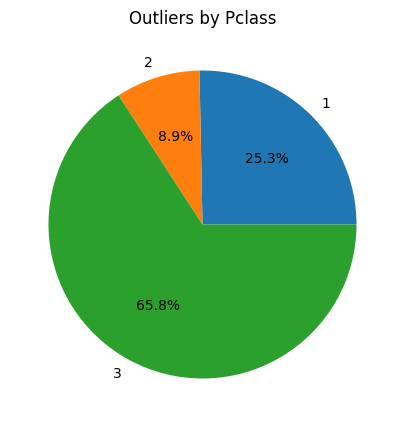

In [ ]:
# Group outliers by Pclass
outliers_by_pclass = outliers.groupby('Pclass')['Fare'].count()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(outliers_by_pclass, autopct="%1.1f%%", labels=outliers_by_pclass.index)
plt.title('Outliers by Pclass')

Did outliers survive at higher rates?

In [ ]:
# Calculate survival rates by passenger class
survival_rates = titanic_df.groupby('Pclass')['Survived'].mean()
survival_rates_percentage = (survival_rates * 100).round(2)
survival_rates_percentage

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

In [ ]:
# Calculate survival rates by passenger class in the outliers
survival_rates = outliers.groupby('Pclass')['Survived'].mean()
survival_rates_percentage = (survival_rates * 100).round(2)
survival_rates_percentage

Pclass
1    70.00
2    28.57
3    15.38
Name: Survived, dtype: float64

It seems cost of the ticket did not necessarily lead to a higher survival rate and actually led to worse rates for passengers of classes 2 and 3. Rather than an outlier of ticket price, examples like those below where an entire families ticket price was summed togther may skew our ML model performance and the data.





In [ ]:
tmp = outliers[outliers['Pclass']==3]
sage_family = tmp[tmp['Fare']==69.550]
sage_family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
38,160,0,3,"Sage, Master. Thomas Henry",male,38.4,8,2,CA. 2343,69.55,S
43,181,0,3,"Sage, Miss. Constance Gladys",female,38.4,8,2,CA. 2343,69.55,S
45,202,0,3,"Sage, Mr. Frederick",male,38.4,8,2,CA. 2343,69.55,S
50,325,0,3,"Sage, Mr. George John Jr",male,38.4,8,2,CA. 2343,69.55,S
69,793,0,3,"Sage, Miss. Stella Anna",female,38.4,8,2,CA. 2343,69.55,S
75,847,0,3,"Sage, Mr. Douglas Bullen",male,38.4,8,2,CA. 2343,69.55,S
77,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,38.4,8,2,CA. 2343,69.55,S


We can remove the outliers from our data to correct for any type of skew they may have on the ML modeling.

In [ ]:
# Remove outliers from the original DataFrame
titanic_df_outliers_removed = titanic_df.drop(outliers.index)

### Convert
We may need to convert categorical or binary columns into numeric columns for our ML algorithms and we have previously done this in this notebook.

In [ ]:
# Convert 'Embarked' to numeric values
titanic_df_outliers_removed['Embarked'] = titanic_df_outliers_removed['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic_df_outliers_removed['Sex'] = titanic_df_outliers_removed['Sex'].map({'male': 0, 'female': 1})
titanic_df_outliers_removed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",1,30.0,0,0,364516,12.4750,0
80,81,0,3,"Waelens, Mr. Achille",0,22.0,0,0,345767,9.0000,0
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",0,29.0,0,0,345779,9.5000,0
82,83,1,3,"McDermott, Miss. Brigdet Delia",1,28.0,0,0,330932,7.7875,2
83,84,0,1,"Carrau, Mr. Francisco M",0,28.0,0,0,113059,47.1000,0


In other datasets, columns may need to be scaled or normalized. These normalized columns can be binned to create a binary high or loss cost feature

In [ ]:
titanic_df_outliers_removed['Log10_Fare'] = np.log10(titanic_df_outliers_removed['Fare'])
titanic_df_outliers_removed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Log10_Fare
79,80,1,3,"Dowdell, Miss. Elizabeth",1,30.0,0,0,364516,12.4750,0,1.096041
80,81,0,3,"Waelens, Mr. Achille",0,22.0,0,0,345767,9.0000,0,0.954243
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",0,29.0,0,0,345779,9.5000,0,0.977724
82,83,1,3,"McDermott, Miss. Brigdet Delia",1,28.0,0,0,330932,7.7875,2,0.891398
83,84,0,1,"Carrau, Mr. Francisco M",0,28.0,0,0,113059,47.1000,0,1.673021


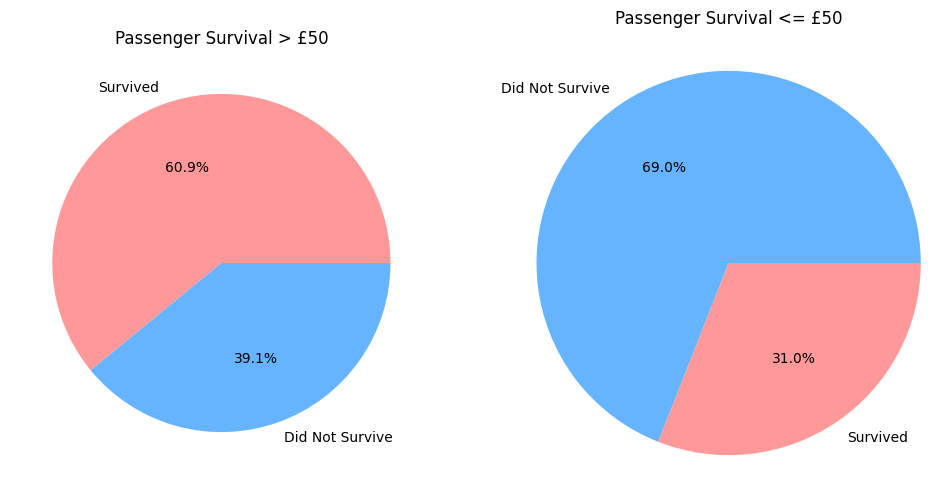

In [ ]:
## Use the Log10 Fare
filtered_high_fare_df = titanic_df_outliers_removed[np.log10(titanic_df_outliers_removed['Fare']) > 1.5]
filtered_low_fare_df = titanic_df_outliers_removed[np.log10(titanic_df_outliers_removed['Fare']) <= 1.5]
high_fare_survival_counts = filtered_high_fare_df['Survived'].value_counts()
low_fare_survival_counts = filtered_low_fare_df['Survived'].value_counts()

# Map the survival status to labels
survival_labels = {0: 'Did Not Survive', 1: 'Survived'}
high_fare_survival_counts.index = high_fare_survival_counts.index.map(survival_labels)
low_fare_survival_counts.index = low_fare_survival_counts.index.map(survival_labels)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#ff9999','#66b3ff']

# Pie chart for high fare
axes[0].pie(high_fare_survival_counts, labels=high_fare_survival_counts.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Passenger Survival > £50')

# Pie chart for low fare
axes[1].pie(low_fare_survival_counts, labels=low_fare_survival_counts.index, autopct='%1.1f%%', colors=colors[::-1])
axes[1].set_title('Passenger Survival <= £50')

_ = plt.axis('equal')

### Create
We can create new featutes using the data provided. For example we can calculate family size on the voyage using a default of 1 plus Sibsp + Parch. We can then bin this column into Alone, Small, Medium, or Large.
- Family_Size of 1 are Alone
- Family_Size of 2 thru 4 are labeled as Small
- Family_Size of 5 or 6 labeled as Medium
- Family_Size >= 7 labeled as Large

In [ ]:
# Build Family_Size parameter
titanic_df_outliers_removed['Family_Size'] = 1 + titanic_df_outliers_removed['SibSp'] + titanic_df_outliers_removed['Parch']

# Bin Family_Size into categories
bins = [0, 1, 4, 6, 100]
labels = ['Alone', 'Small', 'Medium', 'Large']
titanic_df_outliers_removed['Family_Size_Grouped'] = pd.cut(titanic_df_outliers_removed['Family_Size'], bins=bins, labels=labels)
titanic_df_outliers_removed.groupby('Family_Size_Grouped').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Log10_Fare,Family_Size
Family_Size_Grouped,,,,,,,,,,,,,
Alone,496,496,496,496,496,496,496,496,496,496,496,496,496
Small,265,265,265,265,265,265,265,265,265,265,265,265,265
Medium,31,31,31,31,31,31,31,31,31,31,31,31,31
Large,20,20,20,20,20,20,20,20,20,20,20,20,20


<Axes: xlabel='Family_Size', ylabel='count'>

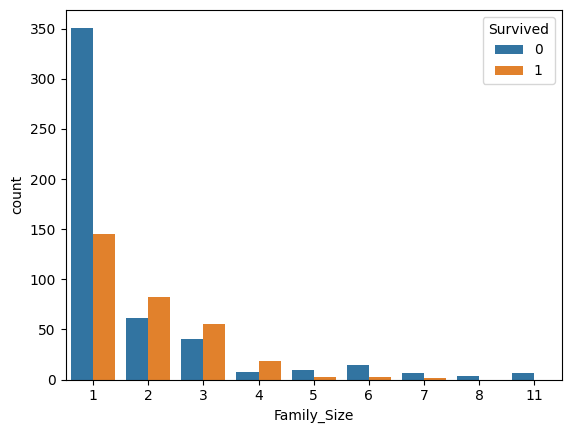

In [ ]:
sns.countplot(x='Family_Size', hue='Survived', data=titanic_df_outliers_removed)

<Axes: xlabel='Family_Size_Grouped', ylabel='count'>

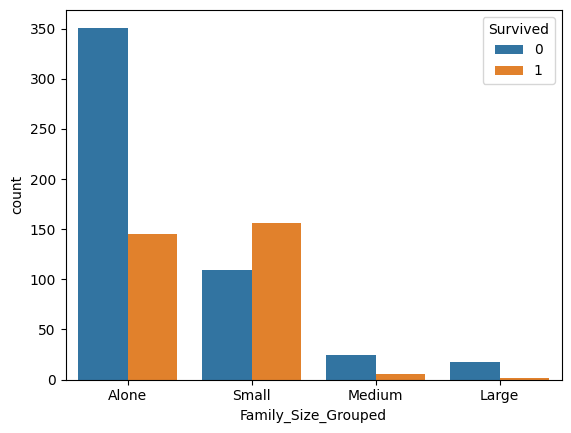

In [ ]:
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=titanic_df_outliers_removed)

In [ ]:
# Split name string to capture title
titanic_df_outliers_removed['Title'] = titanic_df_outliers_removed['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Check if a female passenger is married
titanic_df_outliers_removed['Is_Married'] = 0
titanic_df_outliers_removed['Is_Married'].loc[titanic_df_outliers_removed['Title'] == 'Mrs'] = 1

# Replace titles with more general categories
titanic_df_outliers_removed['Title'] = titanic_df_outliers_removed['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic_df_outliers_removed['Title'] = titanic_df_outliers_removed['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/\nNoble/Clergy')


<Axes: xlabel='Title'>

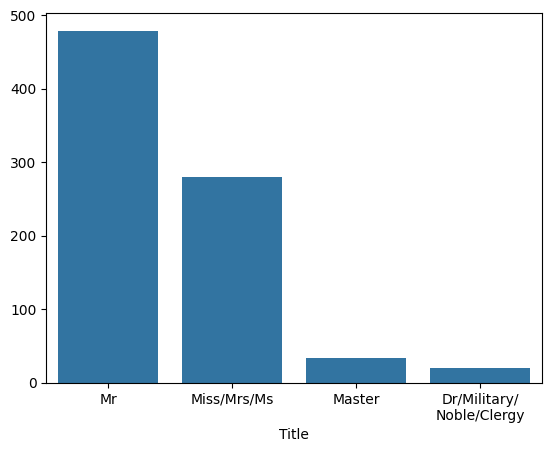

In [ ]:
# Show counts of titles
sns.barplot(x=titanic_df_outliers_removed['Title'].value_counts().index, y=titanic_df_outliers_removed['Title'].value_counts().values)

These new categories may have an impact on the performance of our ML model. There are alot of factors that can be further delved into with more time including titles, surnames, embarked breakdowns etc.

In [ ]:
## End of Script